In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
from datetime import datetime
# today = datetime.now().strftime("%m%d%y")
today = "092324"

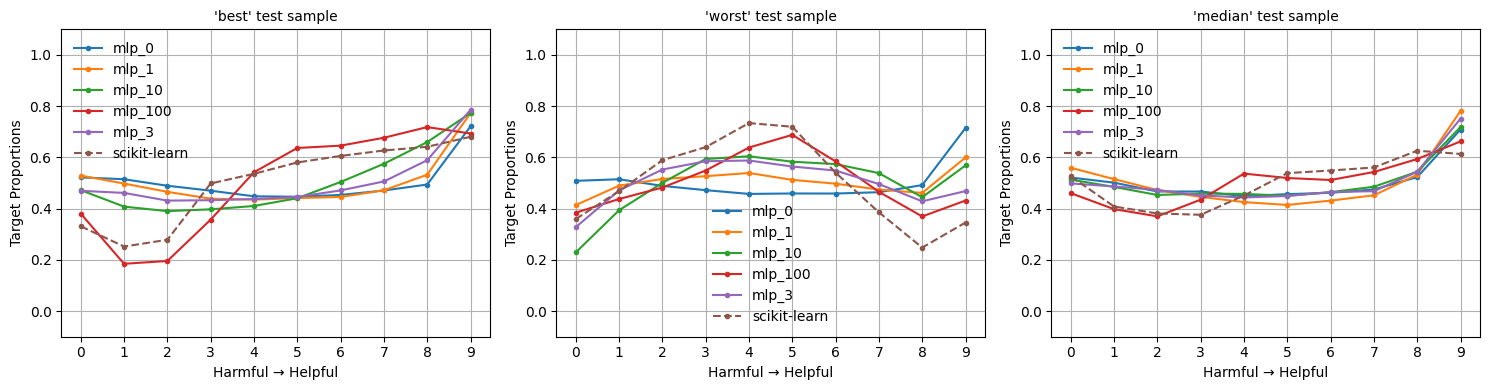

In [3]:
cs = pd.read_csv(f"./saved_data/chunk_stats_0_8_123__{today}.csv")
# cs["epoch"] = cs["epoch"].apply(lambda x: f"mlp_{int(x)}" if not np.isnan(x) else "scikit-learn")
# cs = cs[~cs["epoch"].isin(["mlp_10"])].copy() ## weird sample

stats_mean = cs.drop("round", axis=1).groupby(["epoch", "class_label"]).mean(numeric_only=True)
stats_std  = cs.drop("round", axis=1).groupby(["epoch", "class_label"]).std(numeric_only=True)

# best / median / worst
_, axes = plt.subplots(ncols=3, figsize=(15,4))

class_labels = ["best", "worst", "median"]
for i, class_label in enumerate(class_labels):
    _mean = stats_mean.xs(class_label, level="class_label")
    _std  = stats_std.xs(class_label, level="class_label")
    
    for epoch in _mean.index:
        ls = "--" if epoch == "scikit-learn" else "-"
        axes[i].plot(np.arange(10), _mean.loc[epoch], label=epoch, ls=ls, marker="o", markersize=3)
        # axes[i].errorbar(np.arange(10), _mean.loc[epoch], _std.loc[epoch], label=epoch)

    axes[i].set_title(f"'{class_label}' test sample", fontsize=10)
    axes[i].set_xlabel("Harmful → Helpful")
    axes[i].set_ylabel("Target Proportions")
    axes[i].set_xticks(np.arange(10))
    axes[i].set_ylim(-0.1,1.1)
    axes[i].legend(frameon=False)
    axes[i].grid()

plt.tight_layout()
plt.savefig("imgs/chunk_stats_0_8_123__092324.png")

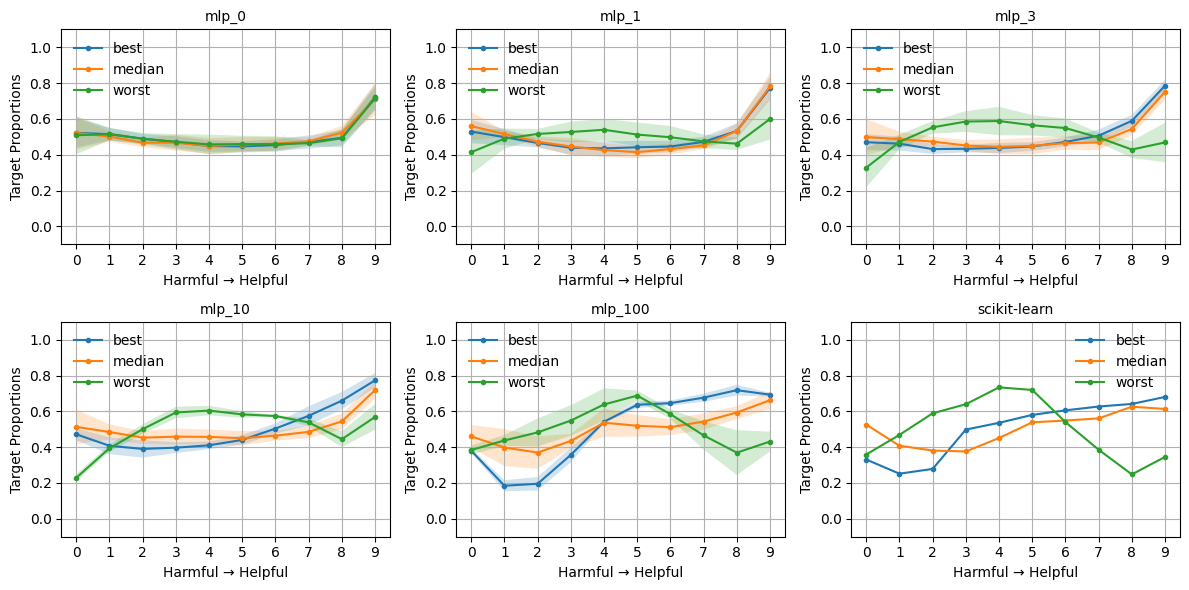

In [4]:
epoch_labels = cs["epoch"].unique().tolist()
epoch_labels = epoch_labels[1:] + [epoch_labels[0]]
# print(epoch_labels)
_, axes = plt.subplots(ncols=len(epoch_labels)//2, nrows=2, figsize=(12,6))
axes = axes.flat

for i, epoch_label in enumerate(epoch_labels):
    _mean = stats_mean.xs(epoch_label, level="epoch")
    _std  = stats_std.xs(epoch_label, level="epoch")

    for class_label in _mean.index:
        axes[i].plot(np.arange(10), _mean.loc[class_label], label=class_label, marker="o", markersize=3)
        # axes[i].errorbar(np.arange(10), _mean.loc[class_label], _std.loc[class_label], label=class_label, marker="o", markersize=3)
        lb = _mean.loc[class_label] - _std.loc[class_label]
        ub = _mean.loc[class_label] + _std.loc[class_label]
        axes[i].fill_between(np.arange(10), lb, ub, alpha=.2)
    
    axes[i].set_title(f"{epoch_label}", fontsize=10)
    axes[i].set_xlabel("Harmful → Helpful")
    axes[i].set_ylabel("Target Proportions")
    axes[i].set_xticks(np.arange(10))
    axes[i].set_ylim(-0.1,1.1)
    axes[i].legend(frameon=False)
    axes[i].grid()

plt.tight_layout()
plt.savefig("imgs/chunk_stats_0_8_123__092324_2.png")

In [5]:
qt = pd.read_csv(f"./saved_data/quantile_stats_0_8_123__{today}.csv")
# qt = pd.read_csv(f"quantile_stats_0_0.01__092324.csv")
# qt["epoch"] = qt["epoch"].apply(lambda x: f"mlp_{int(x)}" if not np.isnan(x) else "scikit-learn") 

display(qt)

# normalize
for x in qt:
    if x.startswith("quantile"):
        qt[x] = qt[x] / qt["quantile_10"] 
        
qt.drop(["quantile_0", "quantile_10"], axis=1, inplace=True)
# display(qt)

qt_stats = qt.drop("round", axis=1).groupby(["epoch", "class_label"]).mean()

,epoch,class_label,round,quantile_0,quantile_1,quantile_2,quantile_3,quantile_4,quantile_5,quantile_6,quantile_7,quantile_8,quantile_9,quantile_10
0,scikit-learn,worst,0,-0.015131,-6.036529e-04,-2.564378e-04,-1.291102e-04,-5.687111e-05,-1.157768e-05,2.652041e-05,8.708187e-05,1.931666e-04,0.000421,0.045124
1,scikit-learn,best,0,-0.000022,-4.063668e-07,-9.613190e-08,2.968871e-08,1.104875e-07,1.962457e-07,3.021352e-07,4.456402e-07,6.894529e-07,0.000001,0.000025
2,scikit-learn,median,0,-0.001067,-1.366019e-05,-6.160429e-06,-3.102742e-06,-1.166739e-06,4.814598e-07,2.398207e-06,5.204651e-06,1.021268e-05,0.000025,0.001329
3,mlp_0,best,0,-0.006761,-7.426344e-04,-4.465315e-04,-2.687829e-04,-1.394400e-04,-1.558582e-05,1.139705e-04,2.577133e-04,4.377624e-04,0.000748,0.008485
4,mlp_0,worst,0,-0.004903,-7.788579e-04,-4.306077e-04,-2.122299e-04,-2.733337e-05,1.398683e-04,3.182003e-04,5.296276e-04,7.842640e-04,0.001280,0.008590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,mlp_10,worst,9,-0.004567,-6.528844e-04,-3.928504e-04,-2.391585e-04,-1.155672e-04,-6.393097e-06,1.083599e-04,2.364661e-04,4.124933e-04,0.000749,0.006418
149,mlp_10,median,9,-0.001845,-1.946184e-04,-1.073202e-04,-5.481015e-05,-1.499336e-05,1.875988e-05,5.520819e-05,9.864024e-05,1.561287e-04,0.000268,0.001557
150,mlp_100,best,9,-0.000040,-5.959145e-07,-1.839139e-07,-2.411364e-08,9.767533e-08,2.035886e-07,3.248053e-07,5.092309e-07,8.288140e-07,0.000002,0.000024
151,mlp_100,worst,9,-0.014311,-6.282451e-04,-2.608912e-04,-1.259586e-04,-5.078647e-05,-5.687049e-06,3.279695e-05,9.467264e-05,2.084002e-04,0.000475,0.041292


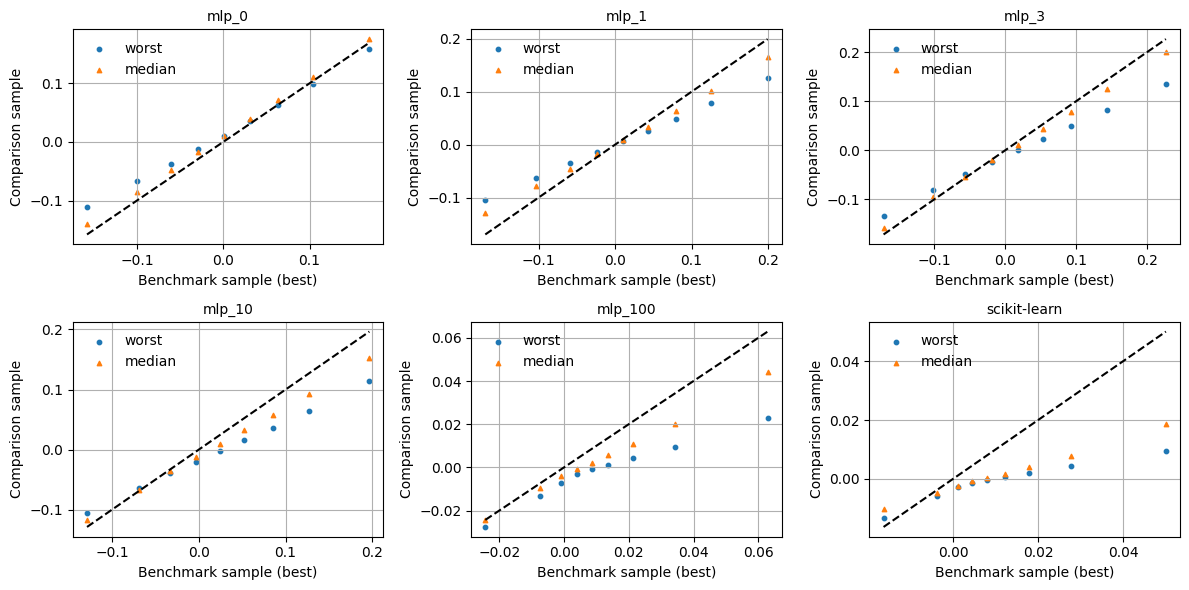

In [6]:
epoch_labels = qt["epoch"].unique().tolist()
epoch_labels = epoch_labels[1:] + [epoch_labels[0]]

_, axes = plt.subplots(ncols=len(epoch_labels)//2, nrows=2, figsize=(12,6))
axes = axes.flat

for i, epoch_label in enumerate(epoch_labels):
    tmp = pd.concat([
        qt_stats.loc[(epoch_label,"best")],
        qt_stats.loc[(epoch_label,"median")],
        qt_stats.loc[(epoch_label,"worst")],
    ], axis=1)[epoch_label]

    tmp.plot.scatter(x="best", y="worst", label="worst", s=10, ax=axes[i])
    tmp.plot.scatter(x="best", y="median", label="median", s=10, c="C1", marker="^", ax=axes[i])
    axes[i].plot(tmp["best"], tmp["best"], ls="--", c="k")
    axes[i].grid()
    axes[i].legend(frameon=False)
    axes[i].set_title(epoch_label, fontsize=10)
    axes[i].set_xlabel("Benchmark sample (best)")
    axes[i].set_ylabel("Comparison sample")

plt.tight_layout()
plt.savefig("imgs/quantile_stats_0_8_123__092324.png")

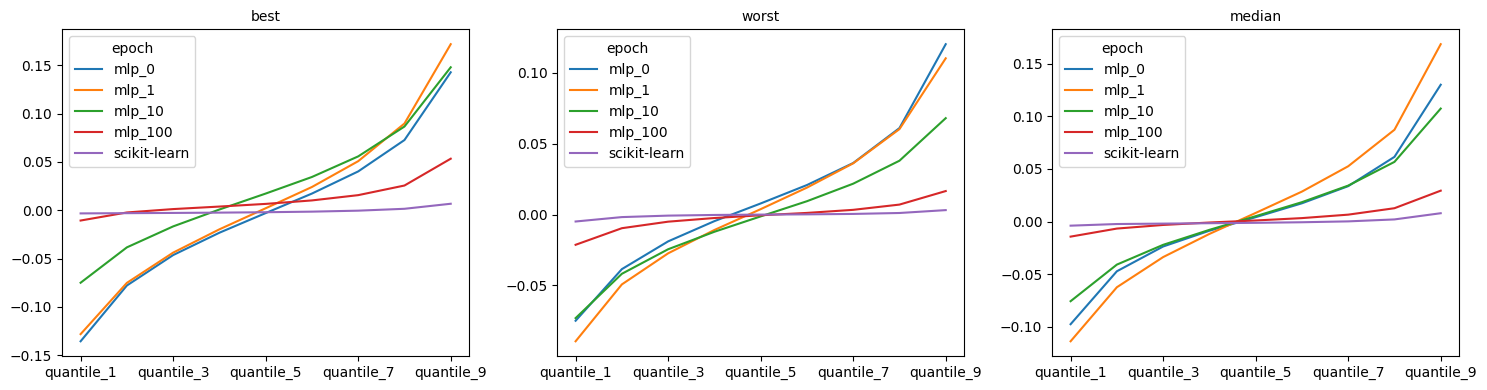

In [166]:
# kind of the sample plot below...
# class_labels = qt["class_label"].unique()
class_labels = ["best", "worst", "median"]

_, axes = plt.subplots(ncols=len(class_labels), figsize=(15,4))

for i, class_label in enumerate(class_labels):
    tmp = qt_stats.xs(class_label, level="class_label")
    benchmark = tmp.loc["scikit-learn"]
    # tmp_df = tmp / benchmark.abs() 
    # tmp_df.T.plot(ax=axes[i])
    tmp.T.plot(ax=axes[i])
    axes[i].set_title(class_label, fontsize=10)

plt.tight_layout();